**Permutation Equivariant Neural Networks**

**Overview:**
- Implemented a feedforward neural network.
- Trained the neural network with L = 5 and w = 2. 
- Showed the training and validation loss versus the number of epochs. 
- Computed the test MSE value. Repeat this for (L,w) set to (2,10), (2,100), (2,200), (3,5), (3,10), (3,100), and (3,200). 

In [134]:
# libraries
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input, Reshape, Lambda
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [135]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [136]:
# loading the data:
x_train = pd.read_csv("/content/drive/My Drive/xtrain-2.csv", delimiter=',', header=None)
y_train = pd.read_csv("/content/drive/My Drive/ytrain-2.csv", delimiter=',', header=None)

x_test = pd.read_csv("/content/drive/My Drive/xtest-2.csv", delimiter=',', header=None)
y_test = pd.read_csv("/content/drive/My Drive/ytest-2.csv", delimiter=',', header=None)

# check for missing values:
print("Missing values in x_train:", x_train.isnull().sum().sum())
print("Missing values in y_train:", y_train.isnull().sum().sum())
print("Missing values in x_test:", x_test.isnull().sum().sum())
print("Missing values in y_test:", y_test.isnull().sum().sum())

# print first few rows:
print("First 5 rows of x_train:\n", x_train.head())
print("First 5 rows of y_train:\n", y_train.head())
print("First 5 rows of x_test:\n", x_test.head())
print("First 5 rows of y_test:\n", y_test.head())

# removing the first row and columns: clearly not a part of the data
x_train = x_train.iloc[1:, 1:]
y_train = y_train.iloc[1:, 1:]
x_test = x_test.iloc[1:, 1:]
y_test = y_test.iloc[1:, 1:]

Missing values in x_train: 1
Missing values in y_train: 1
Missing values in x_test: 1
Missing values in y_test: 1
First 5 rows of x_train:
     0         1         2         3         4         5         6         7   \
0  NaN  0.000000  1.000000  2.000000  3.000000  4.000000  5.000000  6.000000   
1  0.0  0.978738  2.240893  1.867558 -0.977278  0.950088 -0.151357 -0.103219   
2  1.0 -0.549746 -1.402873  1.582752 -1.045147  0.257594 -1.959395 -1.507808   
3  2.0 -2.136196  1.640271 -1.793436 -0.841747  0.502881 -1.245288 -1.057952   
4  3.0  0.096497 -1.863493 -0.277388 -0.354759 -0.082741 -0.627001 -0.043818   

         8         9         10         11         12         13         14  \
0  7.000000  8.000000  9.000000  10.000000  11.000000  12.000000  13.000000   
1  0.410599  0.144044  1.454274   0.761038   0.121675   0.443863   0.333674   
2 -0.315292  0.858179  0.071343  -2.292309  -1.415552   0.885829   0.631902   
3 -0.909008  0.551454  2.292208   0.041539  -1.117925   0.53905

In [137]:
# re-check for missing values and data shape:
print("Missing values in x_train:", x_train.isnull().sum().sum())
print("Missing values in y_train:", y_train.isnull().sum().sum())
print("Missing values in x_test:", x_test.isnull().sum().sum())
print("Missing values in y_test:", y_test.isnull().sum().sum())

print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

Missing values in x_train: 0
Missing values in y_train: 0
Missing values in x_test: 0
Missing values in y_test: 0
x_train shape: (200000, 15)
y_train shape: (200000, 5)
x_test shape: (200000, 15)
y_test shape: (200000, 5)


In [138]:
# convert dataframes to NumPy arrays:
x_train = x_train.values.astype(np.float32)
y_train = y_train.values.astype(np.float32)

x_test = x_test.values.astype(np.float32)
y_test = y_test.values.astype(np.float32)

In [139]:
# train / validation split:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.1, random_state=47) # 47 for repreoducability

Now that the data has been processed and cleaned, we will create the models.

**Model 1: L = 5, w = 2**

In [143]:
# Model 1 (5,2)
L, w = 5, 2
m, d = 5, 3  # input matrix has 5 rows and 3 columns

inputs = Input(shape=(m*d,)) # input size is 5 x 3 = 15 (flattened input vector)

# reshape input to (m, d): since the function is permutation equivariant, we apply transformations row-wise
x = Reshape((-1, d))(inputs) # using -1 to automatically adjust batch size

# first transformation: applies a dense layer that maps each row (which has d = 3 features) to a w = 2 dimensional space
x = Dense(w, activation='relu', use_bias=False)(x) # using bias = false because bias can disrupt symmetry

# hidden layers: each processed independently (ensuring permutation equivariant)
for _ in range(L - 2): # adds 3 (L-2) hidden layers with w=2 neurons each
    x = Dense(w, activation='relu', use_bias=False)(x)

# output layer
outputs = Dense(1, use_bias=False)(x) # maps each row to a scalar output
outputs = Reshape((-1,))(outputs)  # ensures correct output dimension

# create & compile the model
model1 = Model(inputs, outputs)
model1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4, epsilon=1e-3), loss='mse')

model1.summary()

# train the model
history1 = model1.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=100, batch_size=300, verbose=1)

Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_9 (InputLayer)           │ (None, 15)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape_18 (Reshape)                 │ (None, 5, 3)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_45 (Dense)                     │ (None, 5, 2)                │               6 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_46 (Dense)                     │ (None, 5, 2)                │               4 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_47 (Dense)                     │ (None, 5, 2)                │               4 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_48 (Dense)                     │ (None, 5, 2)                │               4 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_49 (Dense)                     │ (None, 5, 1)                │               2 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape_19 (Reshape)                 │ (None, 5)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 20 (80.00 B)

 Trainable params: 20 (80.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.1962 - val_loss: 0.1944
Epoch 2/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.1942 - val_loss: 0.1928
Epoch 3/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.1929 - val_loss: 0.1921
Epoch 4/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.1923 - val_loss: 0.1916
Epoch 5/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.1918 - val_loss: 0.1912
Epoch 6/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.1914 - val_loss: 0.1907
Epoch 7/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.1909 - val_loss: 0.1903
Epoch 8/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.1906 - val_loss: 0.1898
Epoch 9/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.1901 - val_loss: 0.1894
Epoch 10/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.1898 - val_loss: 0.1891
Epoch 11/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.1891 - val_loss: 0.1887
Epoch 12/100
600/600 ━━━━━━━━━━━━━━━━━━━━

In [144]:
# evaluate the model on the test data:
test_mse1 = model1.evaluate(x_test, y_test, verbose=0)

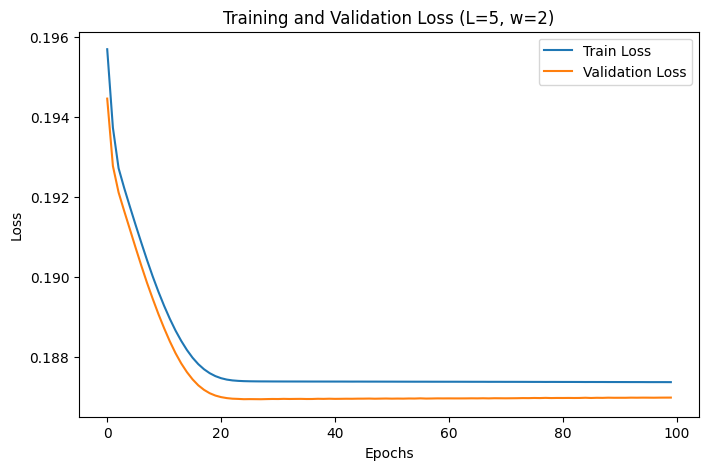

Test MSE for L=5, w=2: 0.1873


In [145]:
# plot of training vs validation loss:
plt.figure(figsize=(8,5))

plt.plot(history1.history["loss"], label="Train Loss")
plt.plot(history1.history["val_loss"], label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title(f"Training and Validation Loss (L={L}, w={w})")

plt.show()

print(f"Test MSE for L={L}, w={w}: {test_mse1:.4f}")

For model 1, the training and validation loss decrease rapidly in the first 20 epochs, then flatten out, which indicates convergence. The validation loss closely follows the training loss, suggesting no overfitting. Since more training does not significantly improve performance, increasing w or trying a larger batch size may help enhance the model.


We will now run the same model for different values of L (depth) and w (width).

**L:** (Number of Layers) Controls how many transformations the input goes through.
- Higher L: Captures more complex patterns but might overfit or slow training.
- Lower L: More simple model, but may not capture enough details.

**w:** (Neurons per Layer) Controls how many features are learned per layer.
- Higher w: More expressive model, but it risks overfitting.
- Lower w: Simpler model, but may not learn enough.

**Model 2: L = 2, w = 10**

In [146]:
L, w = 2, 10

inputs = Input(shape=(m*d,))
x = Reshape((-1, d))(inputs)

x = Dense(w, activation='relu', use_bias=False)(x)

# no hidden layers because L = 2

outputs = Dense(1, use_bias=False)(x)
outputs = Reshape((-1,))(outputs)

model2 = Model(inputs, outputs)
model2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4, epsilon=1e-3), loss='mse')

model2.summary()

history2 = model2.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=100, batch_size=300, verbose=1)

Model: "functional_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_10 (InputLayer)          │ (None, 15)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape_20 (Reshape)                 │ (None, 5, 3)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_50 (Dense)                     │ (None, 5, 10)               │              30 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_51 (Dense)                     │ (None, 5, 1)                │              10 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape_21 (Reshape)                 │ (None, 5)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 40 (160.00 B)

 Trainable params: 40 (160.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.2546 - val_loss: 0.1905
Epoch 2/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1840 - val_loss: 0.1726
Epoch 3/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1721 - val_loss: 0.1699
Epoch 4/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1700 - val_loss: 0.1686
Epoch 5/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.1688 - val_loss: 0.1677
Epoch 6/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.1680 - val_loss: 0.1671
Epoch 7/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.1674 - val_loss: 0.1668
Epoch 8/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.1673 - val_loss: 0.1667
Epoch 9/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.1671 - val_loss: 0.1666
Epoch 10/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.1670 - val_loss: 0.1666
Epoch 11/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.1669 - val_loss: 0.1665
Epoch 12/100
600/600 ━━━━━━━━━━━━━━━━━━━━

In [147]:
test_mse2 = model2.evaluate(x_test, y_test, verbose=0)

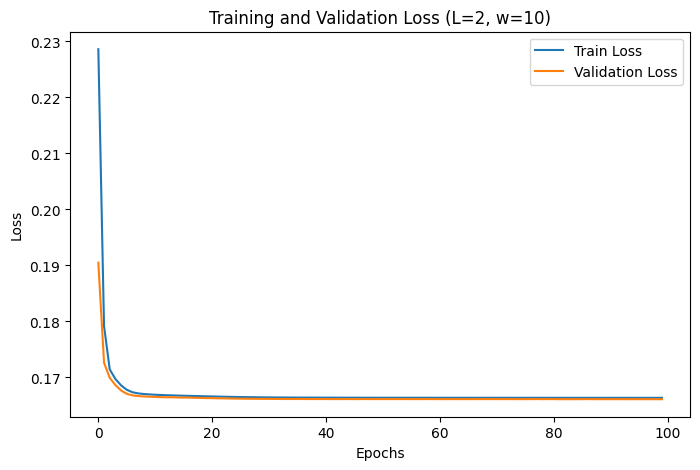

Test MSE for L=2, w=10: 0.1663


In [148]:
plt.figure(figsize=(8,5))
plt.plot(history2.history["loss"], label="Train Loss")
plt.plot(history2.history["val_loss"], label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title(f"Training and Validation Loss (L={L}, w={w})")
plt.show()

print(f"Test MSE for L={L}, w={w}: {test_mse2:.4f}")

The loss decreases sharply in the first few epochs and stabilizes quickly, suggesting fast convergence. The validation loss closely follows the training loss, indicating no overfitting. Compared to Model 1 (L=5 and w=2), this model reaches a lower final loss, likely due to its increased width (w=10), which allows for better feature learning despite having fewer layers.


**Model 3: L = 2, w = 100**

In [149]:
L, w = 2, 100

inputs = Input(shape=(m*d,))
x = Reshape((-1, d))(inputs)

x = Dense(w, activation='relu', use_bias=False)(x)

# no hidden layers because L = 2

outputs = Dense(1, use_bias=False)(x)
outputs = Reshape((-1,))(outputs)

model3 = Model(inputs, outputs)
model3.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4, epsilon=1e-3), loss='mse')

model3.summary()

history3 = model3.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=100, batch_size=300, verbose=1)

Model: "functional_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_11 (InputLayer)          │ (None, 15)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape_22 (Reshape)                 │ (None, 5, 3)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_52 (Dense)                     │ (None, 5, 100)              │             300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_53 (Dense)                     │ (None, 5, 1)                │             100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape_23 (Reshape)                 │ (None, 5)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 400 (1.56 KB)

 Trainable params: 400 (1.56 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.1812 - val_loss: 0.1674
Epoch 2/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1672 - val_loss: 0.1662
Epoch 3/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.1662 - val_loss: 0.1655
Epoch 4/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1657 - val_loss: 0.1651
Epoch 5/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.1655 - val_loss: 0.1649
Epoch 6/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.1652 - val_loss: 0.1648
Epoch 7/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.1653 - val_loss: 0.1647
Epoch 8/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.1651 - val_loss: 0.1646
Epoch 9/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1650 - val_loss: 0.1646
Epoch 10/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1649 - val_loss: 0.1645
Epoch 11/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1650 - val_loss: 0.1645
Epoch 12/100
600/600 ━━━━━━━━━━━━━━━━━━━━

In [150]:
test_mse3 = model3.evaluate(x_test, y_test, verbose=0)

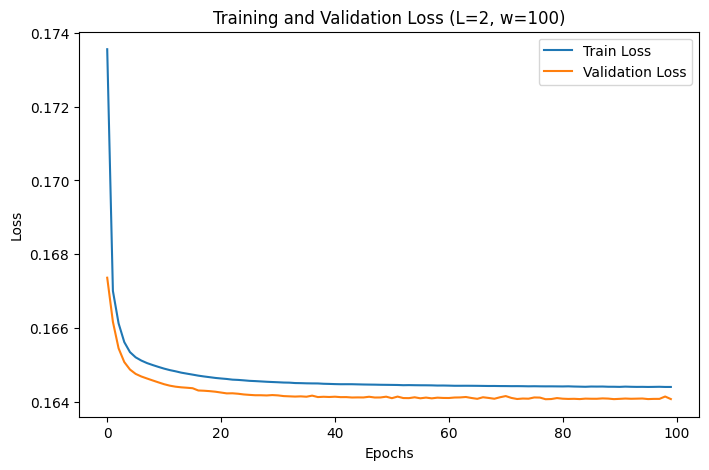

Test MSE for L=2, w=100: 0.1644


In [151]:
plt.figure(figsize=(8,5))
plt.plot(history3.history["loss"], label="Train Loss")
plt.plot(history3.history["val_loss"], label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title(f"Training and Validation Loss (L={L}, w={w})")
plt.show()

print(f"Test MSE for L={L}, w={w}: {test_mse3:.4f}")

The loss decreases quickly in the first few epochs and stabilizes at a lower value than previous models, which indicates improved performance. The validation loss is slightly lower than the training loss, suggesting good generalization with not much overfitting. Compared to Model 2, increasing w to 100 allows the model to learn more complex patterns and leads to a lower final loss.

**Model 4: L = 2, w = 200**

In [152]:
L, w = 2, 200

inputs = Input(shape=(m*d,))
x = Reshape((-1, d))(inputs)

x = Dense(w, activation='relu', use_bias=False)(x)

outputs = Dense(1, use_bias=False)(x)
outputs = Reshape((-1,))(outputs)

model4 = Model(inputs, outputs)
model4.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4, epsilon=1e-3), loss='mse')

model4.summary()

history4 = model4.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=100, batch_size=300, verbose=1)

Model: "functional_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_12 (InputLayer)          │ (None, 15)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape_24 (Reshape)                 │ (None, 5, 3)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_54 (Dense)                     │ (None, 5, 200)              │             600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_55 (Dense)                     │ (None, 5, 1)                │             200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape_25 (Reshape)                 │ (None, 5)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 800 (3.12 KB)

 Trainable params: 800 (3.12 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.2485 - val_loss: 0.1663
Epoch 2/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.1663 - val_loss: 0.1657
Epoch 3/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.1659 - val_loss: 0.1654
Epoch 4/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.1657 - val_loss: 0.1651
Epoch 5/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.1654 - val_loss: 0.1649
Epoch 6/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.1653 - val_loss: 0.1647
Epoch 7/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.1651 - val_loss: 0.1646
Epoch 8/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.1651 - val_loss: 0.1646
Epoch 9/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.1649 - val_loss: 0.1645
Epoch 10/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.1649 - val_loss: 0.1645
Epoch 11/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.1647 - val_loss: 0.1644
Epoch 12/100
600/600 ━━━━━━━━━━━━━━━━━━━━

In [153]:
test_mse4 = model4.evaluate(x_test, y_test, verbose=0)

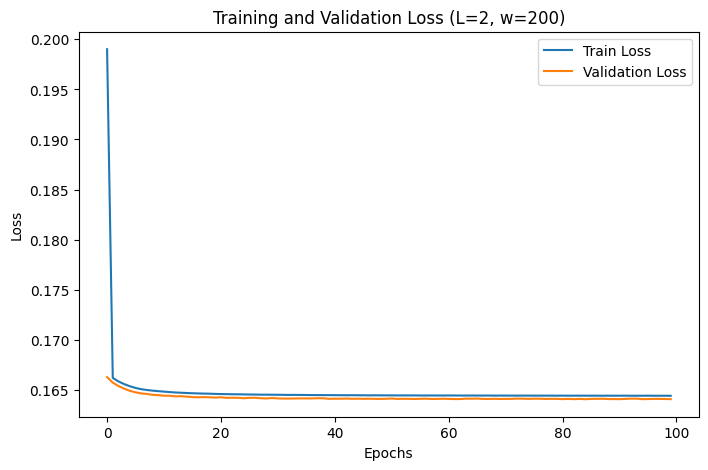

Test MSE for L=2, w=200: 0.1644


In [154]:
plt.figure(figsize=(8,5))
plt.plot(history4.history["loss"], label="Train Loss")
plt.plot(history4.history["val_loss"], label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title(f"Training and Validation Loss (L={L}, w={w})")
plt.show()

print(f"Test MSE for L={L}, w={w}: {test_mse4:.4f}")

The loss drops sharply in the first few epochs and then stabilizes at a slightly lower level than Model 3, and the validation loss closely follows the training loss (no overfitting). Compared to previous models, increasing
w to 200 doesnt provide much improvement. This means that adding more width beyond w=100 might not help much.

**Model 5: L = 3, w = 5**

In [155]:
L, w = 3, 5

inputs = Input(shape=(m*d,))
x = Reshape((-1, d))(inputs)

x = Dense(w, activation='relu', use_bias=False)(x)

outputs = Dense(1, use_bias=False)(x)
outputs = Reshape((-1,))(outputs)

model5 = Model(inputs, outputs)
model5.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4, epsilon=1e-3), loss='mse')

model5.summary()

history5 = model5.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=100, batch_size=300, verbose=1)

Model: "functional_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_13 (InputLayer)          │ (None, 15)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape_26 (Reshape)                 │ (None, 5, 3)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_56 (Dense)                     │ (None, 5, 5)                │              15 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_57 (Dense)                     │ (None, 5, 1)                │               5 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape_27 (Reshape)                 │ (None, 5)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 20 (80.00 B)

 Trainable params: 20 (80.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 89s 3ms/step - loss: 0.6560 - val_loss: 0.4961
Epoch 2/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.4612 - val_loss: 0.3722
Epoch 3/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.3519 - val_loss: 0.3006
Epoch 4/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.2882 - val_loss: 0.2569
Epoch 5/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.2487 - val_loss: 0.2283
Epoch 6/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.2226 - val_loss: 0.2086
Epoch 7/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.2042 - val_loss: 0.1946
Epoch 8/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.1915 - val_loss: 0.1848
Epoch 9/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.1828 - val_loss: 0.1788
Epoch 10/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.1777 - val_loss: 0.1760
Epoch 11/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.1757 - val_loss: 0.1750
Epoch 12/100
600/600 ━━━━━━━━━━━━━━━━━━━

In [156]:
test_mse5 = model5.evaluate(x_test, y_test, verbose=0)

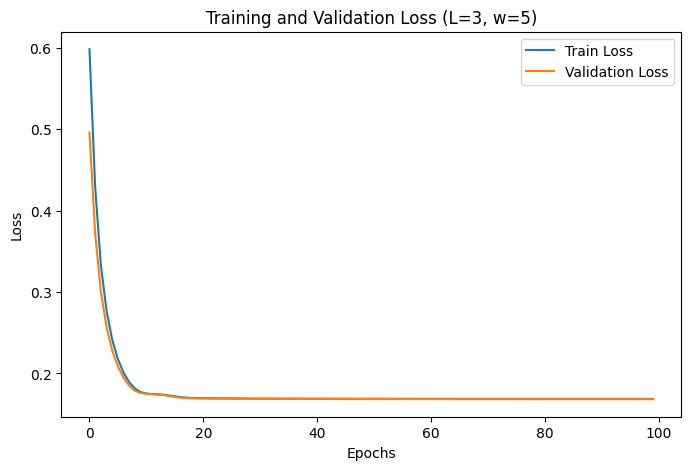

Test MSE for L=3, w=5: 0.1687


In [157]:
plt.figure(figsize=(8,5))
plt.plot(history5.history["loss"], label="Train Loss")
plt.plot(history5.history["val_loss"], label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title(f"Training and Validation Loss (L={L}, w={w})")
plt.show()

print(f"Test MSE for L={L}, w={w}: {test_mse5:.4f}")

The loss starts high but decreases quickly within the first 20. The validation loss closely follows the training loss too (no overfitting). Compared to previous models, the higher depth (L=3) allows for more complex feature extraction, but the small width (w=5) may limit the model's capacity. The final loss is higher than the wider models which indicates that increasing width further could improve performance.

**Model 6: L = 3, w = 10**

In [158]:
L, w = 3, 10

inputs = Input(shape=(m*d,))
x = Reshape((-1, d))(inputs)

x = Dense(w, activation='relu', use_bias=False)(x)

outputs = Dense(1, use_bias=False)(x)
outputs = Reshape((-1,))(outputs)

model6 = Model(inputs, outputs)
model6.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4, epsilon=1e-3), loss='mse')

model6.summary()

history6 = model6.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=100, batch_size=300, verbose=1)

Model: "functional_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_14 (InputLayer)          │ (None, 15)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape_28 (Reshape)                 │ (None, 5, 3)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_58 (Dense)                     │ (None, 5, 10)               │              30 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_59 (Dense)                     │ (None, 5, 1)                │              10 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape_29 (Reshape)                 │ (None, 5)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 40 (160.00 B)

 Trainable params: 40 (160.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.4385 - val_loss: 0.2889
Epoch 2/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.2613 - val_loss: 0.2059
Epoch 3/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.1966 - val_loss: 0.1792
Epoch 4/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.1768 - val_loss: 0.1714
Epoch 5/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.1707 - val_loss: 0.1685
Epoch 6/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.1688 - val_loss: 0.1673
Epoch 7/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.1676 - val_loss: 0.1668
Epoch 8/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.1672 - val_loss: 0.1665
Epoch 9/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.1669 - val_loss: 0.1663
Epoch 10/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.1667 - val_loss: 0.1661
Epoch 11/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.1665 - val_loss: 0.1660
Epoch 12/100
600/600 ━━━━━━━━━━━━━━━━━━━━

In [159]:
test_mse6 = model6.evaluate(x_test, y_test, verbose=0)

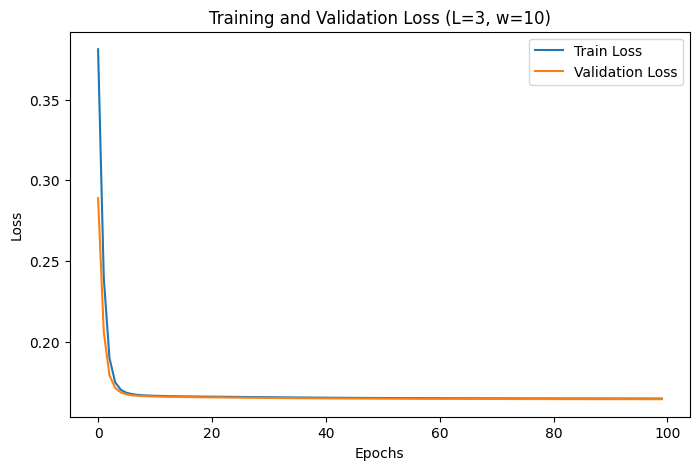

Test MSE for L=3, w=10: 0.1647


In [160]:
plt.figure(figsize=(8,5))
plt.plot(history6.history["loss"], label="Train Loss")
plt.plot(history6.history["val_loss"], label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title(f"Training and Validation Loss (L={L}, w={w})")
plt.show()

print(f"Test MSE for L={L}, w={w}: {test_mse6:.4f}")

The loss for model 6 decreases quickly within the first 20 epochs before stabilizing at a lower value than Model 5, which indicates improved performance. The validation loss also closely matches the training loss. The increased width allows the model to learn more expressive features compared to w=5, but the diminishing difference in final loss suggests further increasing w might not help much.

**Model 7: L = 3, w = 100**

In [161]:
L, w = 3, 100

inputs = Input(shape=(m*d,))
x = Reshape((-1, d))(inputs)

x = Dense(w, activation='relu', use_bias=False)(x)

outputs = Dense(1, use_bias=False)(x)
outputs = Reshape((-1,))(outputs)

model7 = Model(inputs, outputs)
model7.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4, epsilon=1e-3), loss='mse')

model7.summary()

history7 = model7.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=100, batch_size=300, verbose=1)

Model: "functional_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_15 (InputLayer)          │ (None, 15)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape_30 (Reshape)                 │ (None, 5, 3)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_60 (Dense)                     │ (None, 5, 100)              │             300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_61 (Dense)                     │ (None, 5, 1)                │             100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape_31 (Reshape)                 │ (None, 5)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 400 (1.56 KB)

 Trainable params: 400 (1.56 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.2372 - val_loss: 0.1670
Epoch 2/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.1667 - val_loss: 0.1659
Epoch 3/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.1661 - val_loss: 0.1656
Epoch 4/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.1659 - val_loss: 0.1654
Epoch 5/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.1656 - val_loss: 0.1652
Epoch 6/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.1656 - val_loss: 0.1651
Epoch 7/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.1654 - val_loss: 0.1650
Epoch 8/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.1652 - val_loss: 0.1649
Epoch 9/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.1652 - val_loss: 0.1647
Epoch 10/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.1651 - val_loss: 0.1647
Epoch 11/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.1650 - val_loss: 0.1646
Epoch 12/100
600/600 ━━━━━━━━━━━━━━━━━━━━

In [162]:
test_mse7 = model7.evaluate(x_test, y_test, verbose=0)

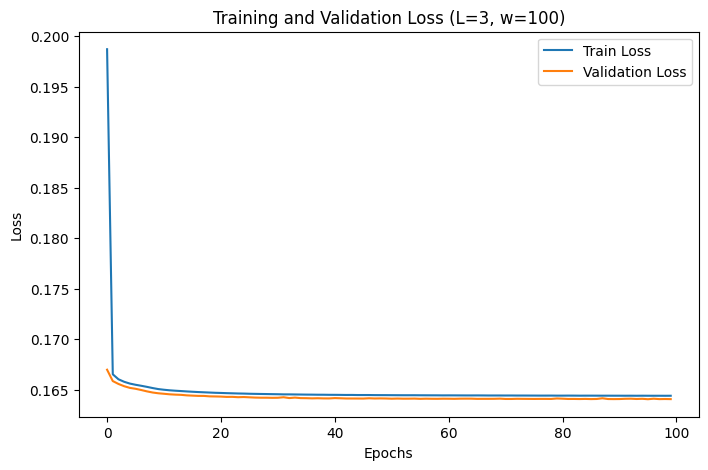

Test MSE for L=3, w=100: 0.1644


In [163]:
plt.figure(figsize=(8,5))
plt.plot(history7.history["loss"], label="Train Loss")
plt.plot(history7.history["val_loss"], label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title(f"Training and Validation Loss (L={L}, w={w})")
plt.show()

print(f"Test MSE for L={L}, w={w}: {test_mse7:.4f}")

The loss decreases rapidly and stabilizes at a lower value compared to previous models with smaller w, indicating improved learning capacity. Increasing the width to  w=100 allows the model to capture more complex patterns, leading to better performance.

**Model 8: L = 3, w = 200**

In [164]:
L, w = 3, 200

inputs = Input(shape=(m*d,))
x = Reshape((-1, d))(inputs)

x = Dense(w, activation='relu', use_bias=False)(x)

outputs = Dense(1, use_bias=False)(x)
outputs = Reshape((-1,))(outputs)

model8 = Model(inputs, outputs)
model8.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4, epsilon=1e-3), loss='mse')

model8.summary()

history8 = model8.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=100, batch_size=300, verbose=1)

Model: "functional_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_16 (InputLayer)          │ (None, 15)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape_32 (Reshape)                 │ (None, 5, 3)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_62 (Dense)                     │ (None, 5, 200)              │             600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_63 (Dense)                     │ (None, 5, 1)                │             200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape_33 (Reshape)                 │ (None, 5)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 800 (3.12 KB)

 Trainable params: 800 (3.12 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.1821 - val_loss: 0.1658
Epoch 2/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.1660 - val_loss: 0.1653
Epoch 3/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.1654 - val_loss: 0.1650
Epoch 4/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.1652 - val_loss: 0.1648
Epoch 5/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.1651 - val_loss: 0.1647
Epoch 6/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.1650 - val_loss: 0.1646
Epoch 7/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.1649 - val_loss: 0.1645
Epoch 8/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.1649 - val_loss: 0.1645
Epoch 9/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.1649 - val_loss: 0.1645
Epoch 10/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.1649 - val_loss: 0.1644
Epoch 11/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.1647 - val_loss: 0.1644
Epoch 12/100
600/600 ━━━━━━━━━━━━━━━━━━━━

In [165]:
test_mse8 = model8.evaluate(x_test, y_test, verbose=0)

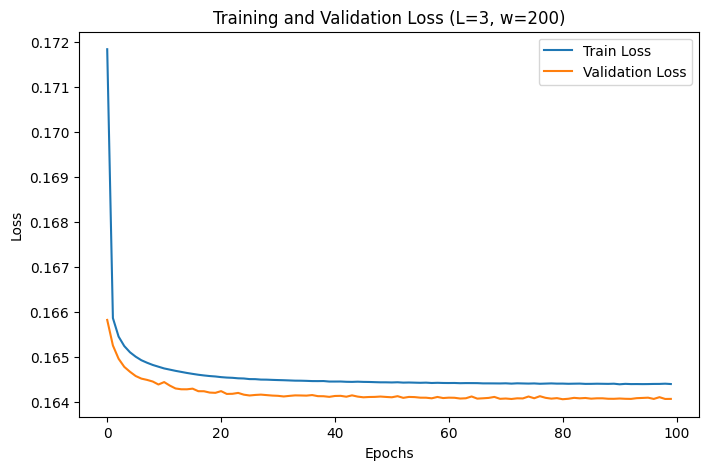

Test MSE for L=3, w=200: 0.1644


In [166]:
plt.figure(figsize=(8,5))
plt.plot(history8.history["loss"], label="Train Loss")
plt.plot(history8.history["val_loss"], label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title(f"Training and Validation Loss (L={L}, w={w})")
plt.show()

print(f"Test MSE for L={L}, w={w}: {test_mse8:.4f}")

For Model 8, the loss decreases quickly in the early epochs and stabilizes at a value close to Model 7. The validation loss is slightly lower than the training loss (strong generalization wihtout overfitting). The marginal improvement over w=100 suggests that increasing width beyond a certain point provides diminishing returns, as the model may already have sufficient capacity to learn the necessary patterns.

**Conclusion:**

Effect of Increasing w (Width):
- As w increased, models achieved lower final loss values, indicating that wider layers allow for better feature learning.
- Beyond w=100, improvements became marginal (w=200 showed only slight gains over w=100).
- Models with very small w (2 or 5) had higher loss values, likely due to insufficient capacity.

Effect of Increasing L (Depth):
- Increasing L from 2 to 3 generally improved performance, as deeper models can capture more complex patterns.
- (5,2) performed worse than shallower models with higher w, indicating that depth alone is not enough if layers are too narrow.
- (3,100) and (3,200) provided the best overall results, balancing depth and width.

The best-performing models were those that balanced depth and width, particularly
(3,100) and (3,200). Increasing width significantly improves performance, but after a certain point (w=100), the gains become minimal. Depth also contributes, but only when paired with sufficient width.
